In [1]:
!pip -q install tensorflow=="2.4"
!pip install -q --use-deprecated=legacy-resolver tflite-model-maker
!pip install -q pycocotools

     |████████████████████████████████| 394.7 MB 14 kB/s 
     |████████████████████████████████| 462 kB 61.0 MB/s 
     |████████████████████████████████| 3.8 MB 66.4 MB/s 
     |████████████████████████████████| 2.9 MB 34.2 MB/s 
     |████████████████████████████████| 591 kB 3.9 MB/s 
     |████████████████████████████████| 64 kB 4.3 MB/s 
     |████████████████████████████████| 1.1 MB 84.4 MB/s 
     |████████████████████████████████| 6.3 MB 87.1 MB/s 
     |████████████████████████████████| 87 kB 8.8 MB/s 
     |████████████████████████████████| 636 kB 64.9 MB/s 
     |████████████████████████████████| 840 kB 93.9 MB/s 
     |████████████████████████████████| 1.1 MB 82.2 MB/s 
     |████████████████████████████████| 103 kB 83.8 MB/s 
     |████████████████████████████████| 1.2 MB 69.7 MB/s 
     |████████████████████████████████| 211 kB 70.2 MB/s 
     |████████████████████████████████| 120 kB 73.6 MB/s 
     |████████████████████████████████| 352 kB 74.7 MB/s 
     |█████████████

In [ ]:
!nvidia-smi  -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-a65bada7-8bac-4790-88dc-958de9c06d51)


In [ ]:
!curl -L "https://app.roboflow.com/ds/MRtJOCvWpY?key=v5dj2YEsFa" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
!mkdir /content/test/images
!mkdir /content/test/annotations
!mkdir /content/train/images
!mkdir /content/train/annotations
!mkdir /content/valid/images
!mkdir /content/valid/annotations
!mv /content/test/*.jpg /content/test/images
!mv /content/test/*.xml /content/test/annotations
!mv /content/train/*.jpg /content/train/images
!mv /content/train/*.xml /content/train/annotations
!mv /content/valid/*.jpg /content/valid/images
!mv /content/valid/*.xml /content/valid/annotations

In [ ]:
spec = model_spec.get('efficientdet_lite0')


In [ ]:
train_data = object_detector.DataLoader.from_pascal_voc(
    "/content/train/images",
    "/content/train/annotations",
    label_map={1: "masked", 2: "unmasked"})
validation_data = object_detector.DataLoader.from_pascal_voc(
    "/content/valid/images",
    "/content/valid/annotations",
    label_map={1: "masked", 2: "unmasked"}) 
test_data = object_detector.DataLoader.from_pascal_voc(
    "/content/test/images",
    "/content/test/annotations",
    label_map={1: "masked", 2: "unmasked"})   





In [ ]:
model = object_detector.create(train_data, model_spec=spec,train_whole_model=True,validation_data=validation_data,epochs=300)


Epoch 1/300
9/9 [==============================] - 63s 2s/step - det_loss: 1.7406 - cls_loss: 1.1402 - box_loss: 0.0120 - reg_l2_loss: 0.0630 - loss: 1.8036 - learning_rate: 0.0432 - gradient_norm: 0.6824 - val_det_loss: 1.5688 - val_cls_loss: 1.0479 - val_box_loss: 0.0104 - val_reg_l2_loss: 0.0630 - val_loss: 1.6318
Epoch 2/300
9/9 [==============================] - 11s 1s/step - det_loss: 1.3192 - cls_loss: 0.8787 - box_loss: 0.0088 - reg_l2_loss: 0.0630 - loss: 1.3822 - learning_rate: 0.0800 - gradient_norm: 1.1070 - val_det_loss: 2.0652 - val_cls_loss: 1.6028 - val_box_loss: 0.0092 - val_reg_l2_loss: 0.0630 - val_loss: 2.1282
Epoch 3/300
9/9 [==============================] - 11s 1s/step - det_loss: 0.8180 - cls_loss: 0.4943 - box_loss: 0.0065 - reg_l2_loss: 0.0631 - loss: 0.8811 - learning_rate: 0.0800 - gradient_norm: 1.1865 - val_det_loss: 3.1800 - val_cls_loss: 2.6507 - val_box_loss: 0.0106 - val_reg_l2_loss: 0.0631 - val_loss: 3.2432
Epoch 4/300
9/9 [==========================

In [ ]:
model.export(export_dir='.')

In [ ]:
model.evaluate(test_data)


2/2 [==============================] - 11s 4s/step



{'AP': 0.58156604,
 'AP50': 0.9902422,
 'AP75': 0.6033586,
 'AP_/masked': 0.54434675,
 'AP_/unmasked': 0.6187853,
 'APl': 0.5816,
 'APm': -1.0,
 'APs': -1.0,
 'ARl': 0.658,
 'ARm': -1.0,
 'ARmax1': 0.633,
 'ARmax10': 0.658,
 'ARmax100': 0.658,
 'ARs': -1.0}

In [ ]:
model.evaluate_tflite('model.tflite', test_data)


100/100 [==============================] - 257s 3s/step



{'AP': 0.5366412,
 'AP50': 0.9821394,
 'AP75': 0.4733857,
 'AP_/masked': 0.4941505,
 'AP_/unmasked': 0.5791318,
 'APl': 0.5366412,
 'APm': -1.0,
 'APs': -1.0,
 'ARl': 0.613,
 'ARm': -1.0,
 'ARmax1': 0.611,
 'ARmax10': 0.613,
 'ARmax100': 0.613,
 'ARs': -1.0}

In [ ]:
import cv2

from PIL import Image

model_path = 'model.tflite'

# Load the labels into a list
classes = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
  classes[label_id-1] = label_name

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  return resized_img, original_image


def set_input_tensor(interpreter, image):
  """Set the input tensor."""
  tensor_index = interpreter.get_input_details()[0]['index']
  input_tensor = interpreter.tensor(tensor_index)()[0]
  input_tensor[:, :] = image


def get_output_tensor(interpreter, index):
  """Retur the output tensor at the given index."""
  output_details = interpreter.get_output_details()[index]
  tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
  return tensor


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""
  # Feed the input image to the model
  set_input_tensor(interpreter, image)
  interpreter.invoke()

  # Get all outputs from the model
  boxes = get_output_tensor(interpreter, 0)
  classes = get_output_tensor(interpreter, 1)
  scores = get_output_tensor(interpreter, 2)
  count = int(get_output_tensor(interpreter, 3))

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

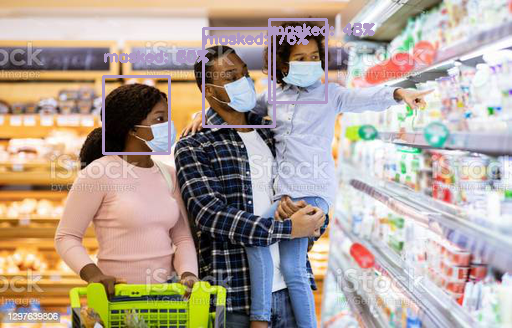

In [ ]:
INPUT_IMAGE_URL = "https://media.istockphoto.com/photos/family-shopping-during-coronavirus-pandemic-black-family-with-child-picture-id1297639806?s=612x612"
DETECTION_THRESHOLD = 0.3

TEMP_FILE = '/tmp/image.png'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)